In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
path_train= '/Users/dc18/Datasets/scaler_timeseries/train_1.csv'
path_exo= '/Users/dc18/Datasets/scaler_timeseries/Exog_Campaign_eng'

In [57]:
data=pd.read_csv(path_train)
exo=pd.read_csv(path_exo)
df=data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [58]:
data.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [59]:
{"type":"dataframe"}

{'type': 'dataframe'}

In [60]:
data.shape

(145063, 551)

In [61]:
new_feature = data.Page.str.extract(r'(?P<title>.*)\_(?P<language>.*).wikipedia.org\_(?P<access_type>.*)\_(?P<access_origin>.*)')

In [62]:
new_feature[0:10]

,title,language,access_type,access_origin
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [63]:
df1 = pd.concat([new_feature, data], axis=1)
df1=df1.drop(columns=['Page'])

In [64]:
df1.head()

,title,language,access_type,access_origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh,all-access,spider,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [65]:
df1['language'].unique()

array(['zh', 'fr', 'en', nan, 'ru', 'de', 'ja', 'es'], dtype=object)

Here we have all the languages in the dataset. Let us map the languages properly.

In [66]:
language_dict = {"es":"spanish", "zh":"chinese", "ru":"russian",
"fr":"french", "de":"german", "en":"english", "ja":"japanese"}
df1["language"]=df1["language"].map(language_dict)

df1.head()

,title,language,access_type,access_origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,chinese,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,chinese,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,chinese,all-access,spider,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [67]:
 (df1.isna().sum()/df1.shape[0]*100).head(10)

title            12.308445
language         12.308445
access_type      12.308445
access_origin    12.308445
2015-07-01       14.297236
2015-07-02       14.349627
2015-07-03       14.162123
2015-07-04       14.237952
2015-07-05       14.241399
2015-07-06       14.120072
dtype: float64

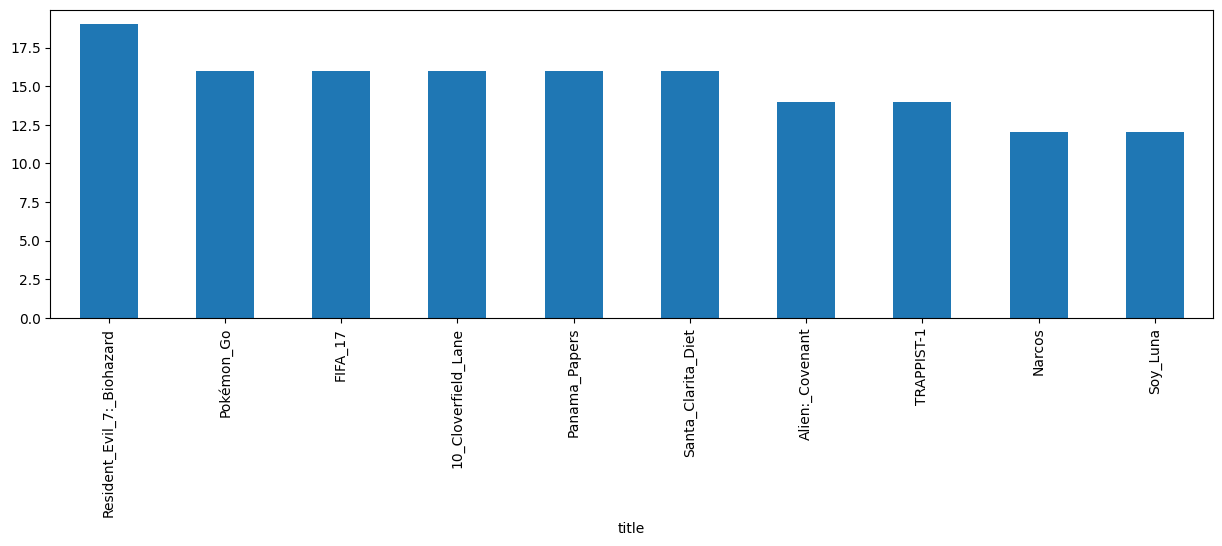

In [68]:
na_rows = df1[df1.isna().any(axis=1)]
na_title_counts = na_rows['title'].value_counts().sort_values(ascending=False)[:10]
na_title_counts.plot(kind='bar', figsize=(15, 4))
plt.show()

'Resident_Evil_7:_Biohazard' this topic ahas the maximum number of missing values in all the languages

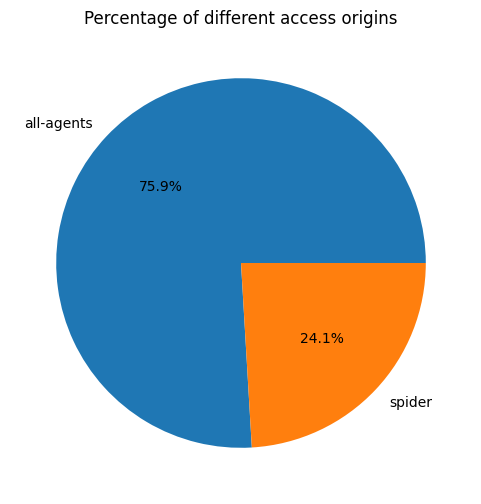

In [69]:
plt.figure(figsize=(6,6))
access_origin_counts= df1['access_origin'].value_counts(normalize=True)
access_origin_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of different access origins")
plt.ylabel("")
plt.show()


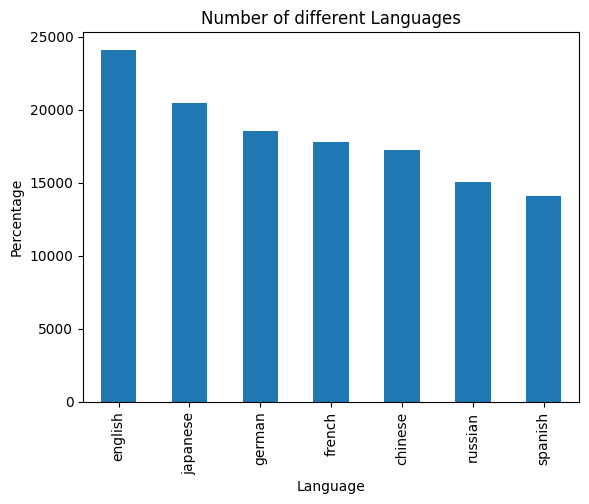

In [70]:
language_counts = df1['language'].value_counts()
ax = language_counts.plot(kind='bar')


plt.title("Number of different Languages")
plt.xlabel("Language")
plt.ylabel("Percentage")
plt.show()


Text(0.5, 1.0, 'Percentage of access_type')

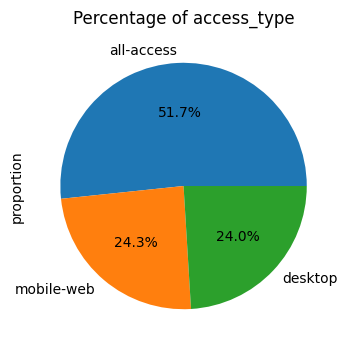

In [71]:
plt.figure(figsize=(8,4))
access_type_counts= df1['access_type'].value_counts(normalize=True)
access_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of access_type")


In [72]:
df_group = df1.groupby(["language"])[df1.columns[4:]].median()
df_group

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
language,,,,,,,,,,,,,,,,,,,,,
chinese,72.0,68.0,67.0,69.0,72.0,65.5,68.0,71.0,74.0,76.0,...,107.0,107.0,109.0,119.0,115.0,117.0,117.5,110.0,109.0,106.0
english,243.0,242.0,221.0,215.0,232.0,248.0,258.0,259.0,263.0,242.0,...,517.0,484.0,422.0,449.0,523.0,587.0,578.0,579.0,554.0,481.0
french,101.0,102.0,100.0,100.0,112.0,108.0,107.0,109.5,105.0,98.0,...,164.0,159.0,144.0,157.0,191.0,194.0,193.0,190.0,193.0,166.0
german,99.0,97.0,95.0,96.0,113.0,108.5,110.0,115.0,113.0,104.0,...,130.0,122.0,107.0,148.0,157.0,162.0,162.0,160.0,152.0,127.0
japanese,172.0,167.0,176.0,192.0,190.0,179.0,178.0,179.0,179.0,176.0,...,224.0,251.0,241.0,243.0,228.0,237.0,226.0,240.0,246.0,232.0
russian,180.0,183.0,182.0,177.0,189.0,194.0,191.0,190.0,194.0,232.0,...,336.0,332.0,334.0,363.0,344.0,324.0,313.0,301.0,276.0,218.0
spanish,368.0,362.0,322.0,261.0,311.0,376.0,371.0,364.0,357.0,318.0,...,230.0,188.0,144.0,148.0,216.0,229.0,237.0,228.0,203.0,160.0


In [73]:
dff=df_group.T
dff

language,chinese,english,french,german,japanese,russian,spanish
2015-07-01,72.0,243.0,101.0,99.0,172.0,180.0,368.0
2015-07-02,68.0,242.0,102.0,97.0,167.0,183.0,362.0
2015-07-03,67.0,221.0,100.0,95.0,176.0,182.0,322.0
2015-07-04,69.0,215.0,100.0,96.0,192.0,177.0,261.0
2015-07-05,72.0,232.0,112.0,113.0,190.0,189.0,311.0
...,...,...,...,...,...,...,...
2016-12-27,117.0,587.0,194.0,162.0,237.0,324.0,229.0
2016-12-28,117.5,578.0,193.0,162.0,226.0,313.0,237.0
2016-12-29,110.0,579.0,190.0,160.0,240.0,301.0,228.0
2016-12-30,109.0,554.0,193.0,152.0,246.0,276.0,203.0


In [74]:
dff.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [75]:
dff.index= pd.to_datetime(dff.index)
dff.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq=None)

In [76]:
dff.isnull().sum()

language
chinese     0
english     0
french      0
german      0
japanese    0
russian     0
spanish     0
dtype: int64

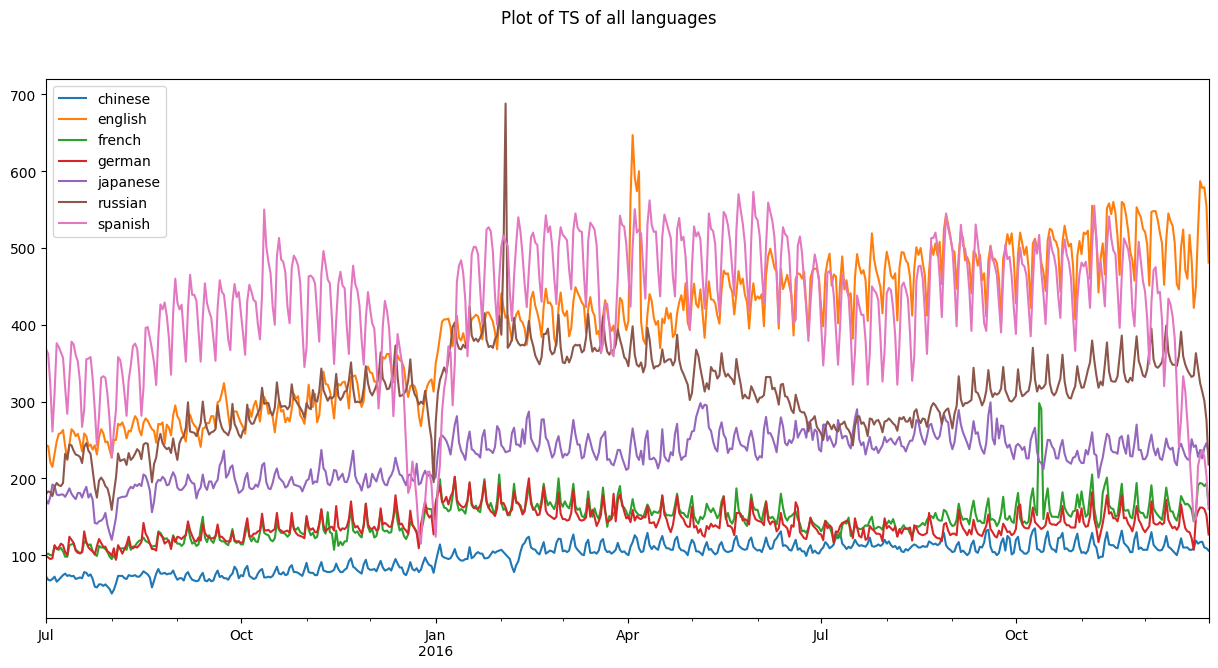

In [77]:
plt.suptitle("Plot of TS of all languages")
for i in dff.columns:
 dff[i].plot(x=dff.index,figsize=(15,7))
plt.legend()

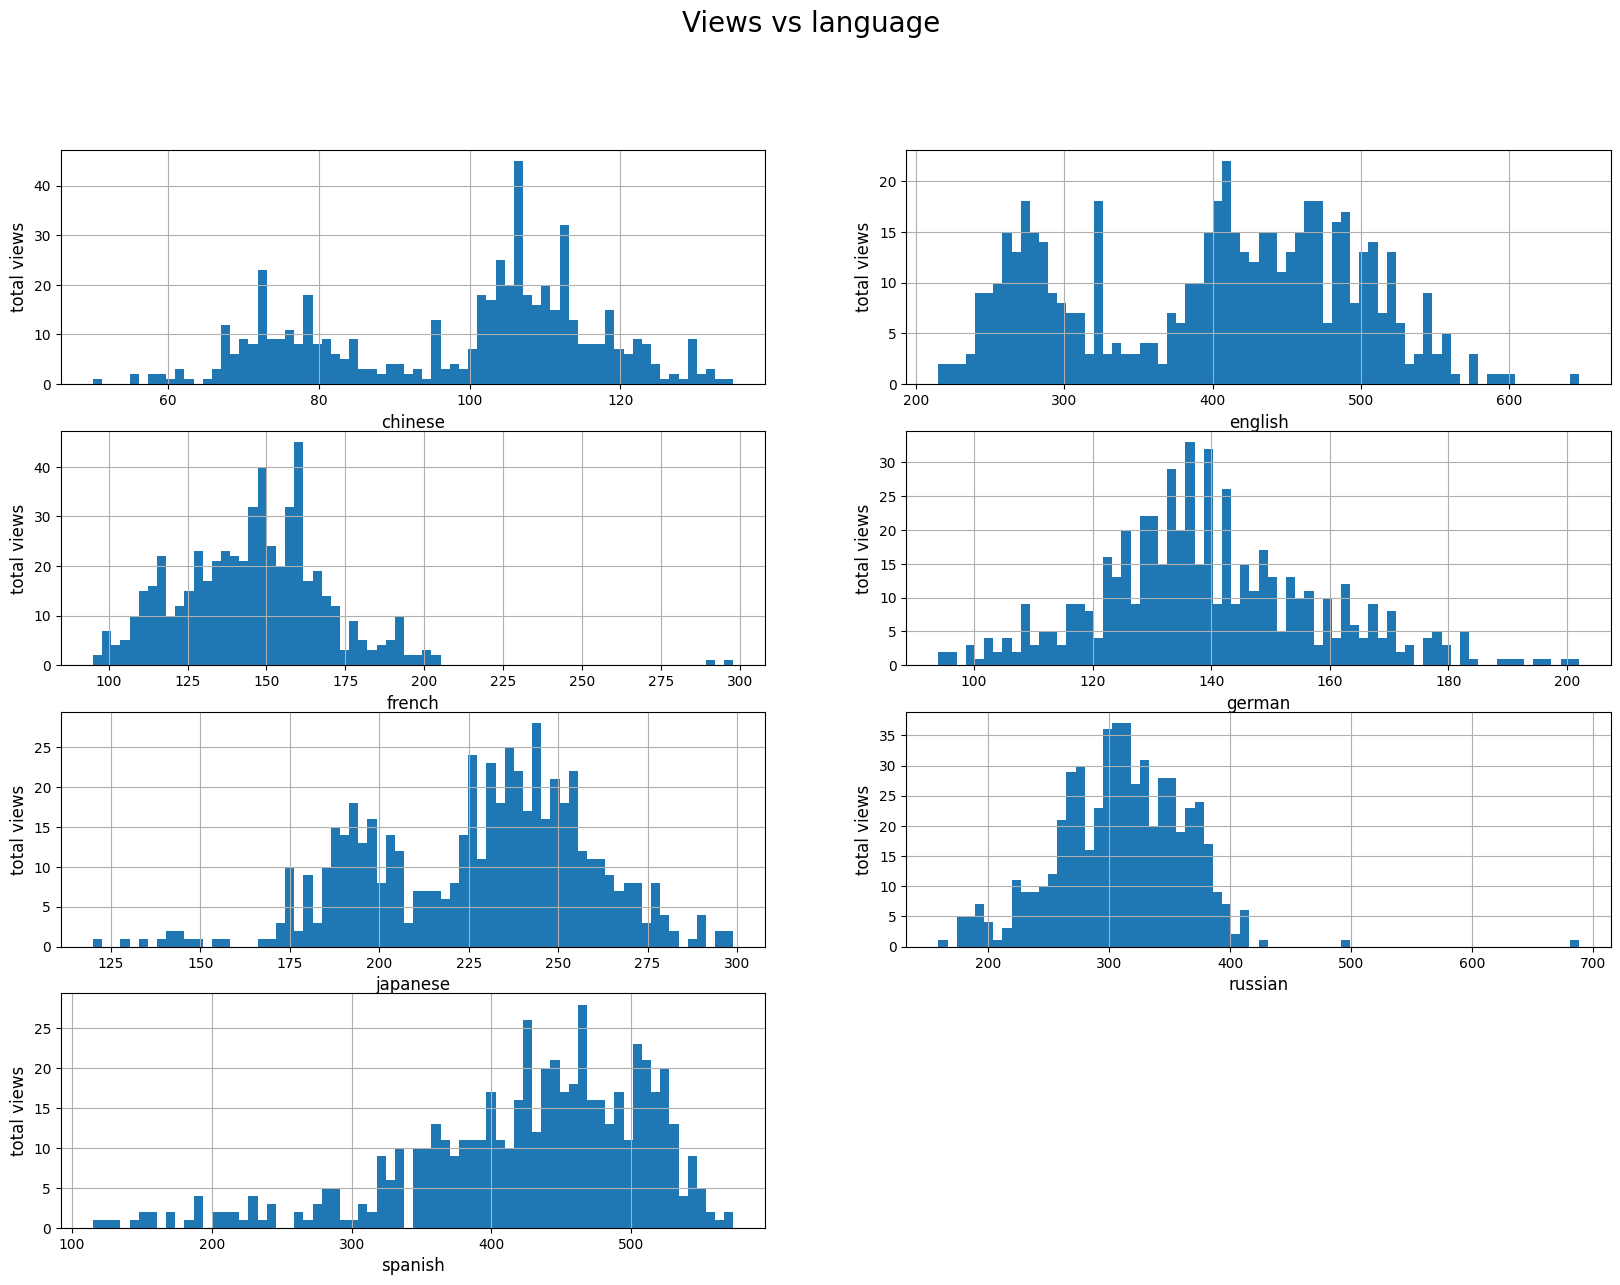

In [78]:
col=list(dff.columns)
col
['chinese', 'english', 'french', 'german', 'japanese', 'russian',
'spanish']

plt.figure(figsize=(20,14)).suptitle("Views vs language",fontsize=20)
for i in range(len(col)):
 plt.subplot(4, 2, i+1)
 dff[col[i]].hist(bins=70).plot()
 plt.xlabel(col[i], fontsize=12)
 plt.ylabel('total views', fontsize=12)

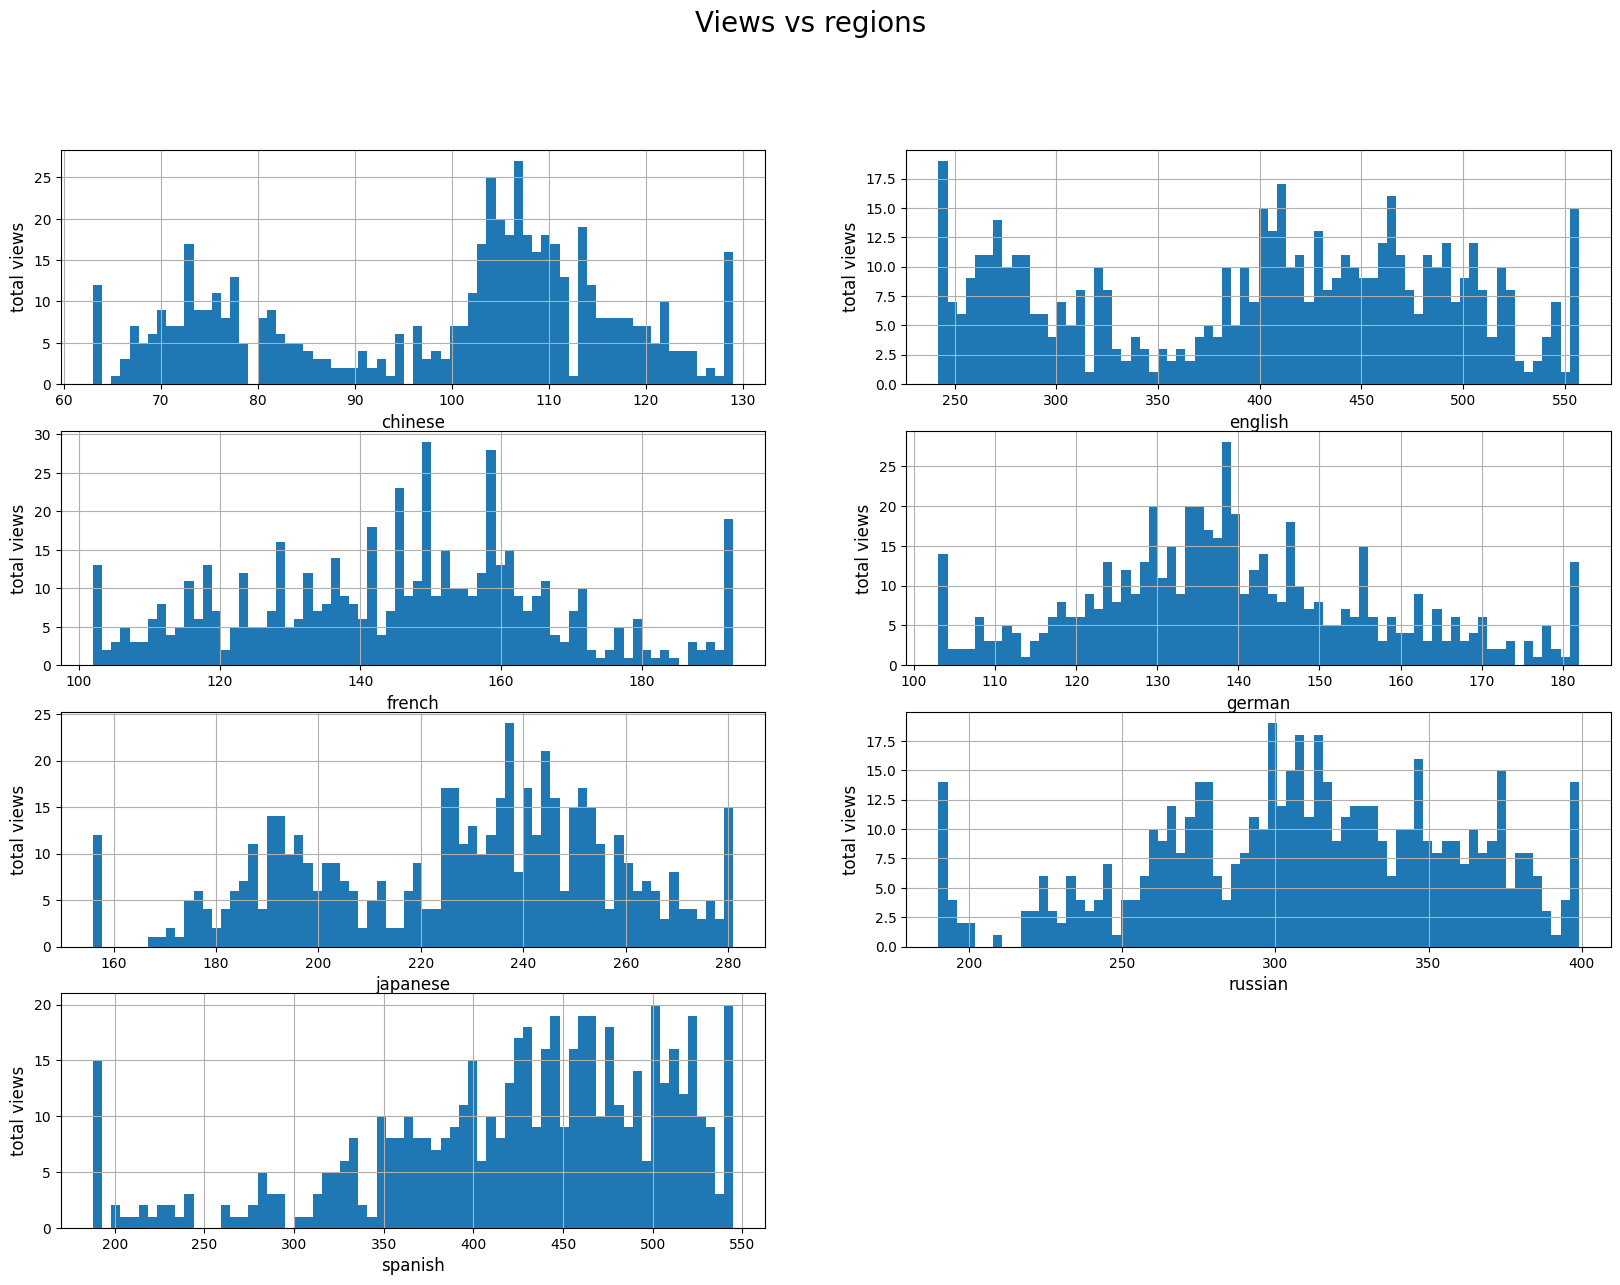

In [79]:
for i in col:
 upp=dff[i].quantile(0.98)
 low=dff[i].quantile(0.02)
 dff[i] = dff[i].clip(upper=upp, lower=low)

plt.figure(figsize=(20,14)).suptitle("Views vs regions",fontsize=20)
for i in range(len(col)):
 plt.subplot(4, 2, i+1)
 dff[col[i]].hist(bins=70).plot()
 plt.xlabel(col[i], fontsize=12)
 plt.ylabel('total views', fontsize=12)

let us decompose the time series for english language

In [80]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

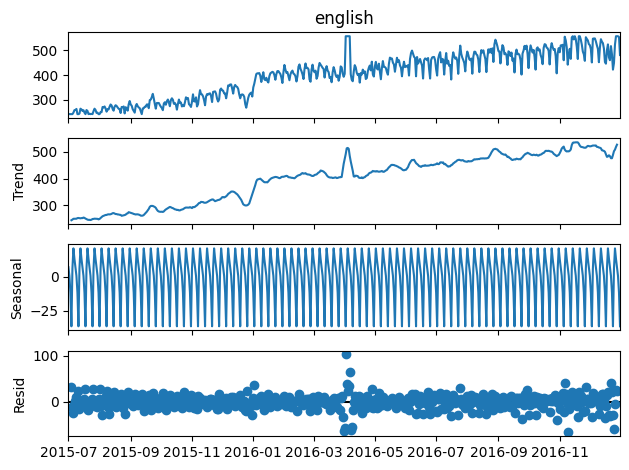

In [81]:
model = sm.tsa.seasonal_decompose(dff['english'], model='additive')
decomposed=model.plot()

<Axes: >

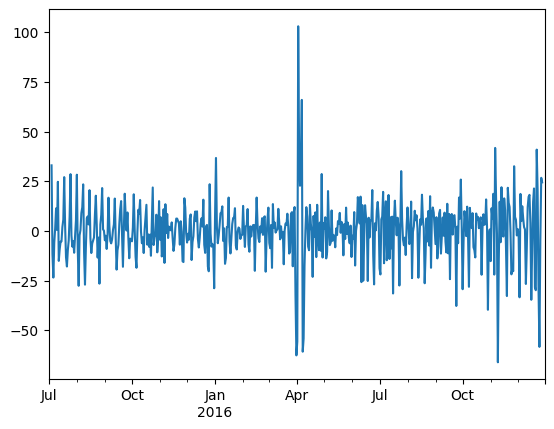

In [82]:
model.resid.plot()

<Axes: >

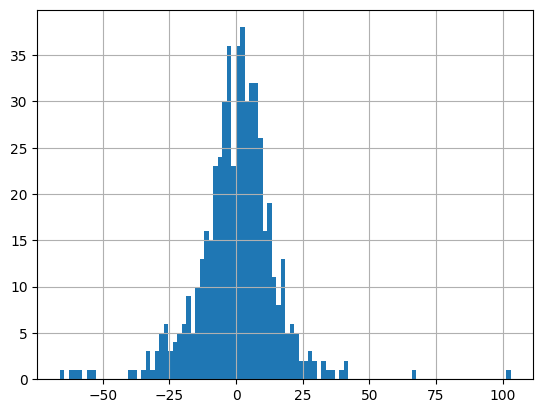

In [83]:
model.resid.hist(bins=100)

In [84]:
for i in col:
    p_value= sm.tsa.stattools.adfuller(dff['english'])[1]
    if p_value<0.05:
        print(f"{i} is stationary")
    else:
        print(f"{i} is non stationary")

chinese is non stationary
english is non stationary
french is non stationary
german is non stationary
japanese is non stationary
russian is non stationary
spanish is non stationary


Removing the trend and seasonality from English language

<Axes: >

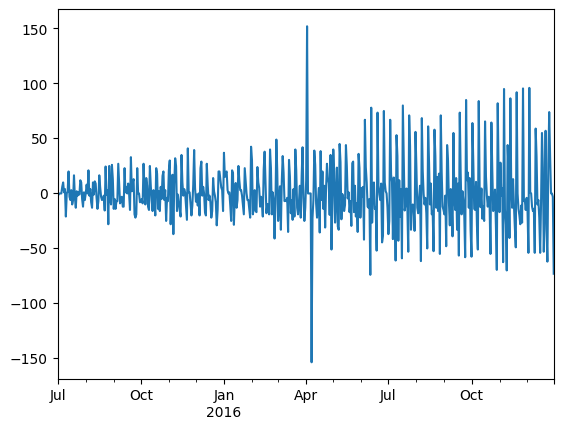

In [85]:
detrend = dff['english'].diff(1)
detrend.plot()

In [86]:
p_value=sm.tsa.stattools.adfuller(detrend.dropna())[1]
if p_value<0.05:
 print(f"English is stationary")
else:
 print(f"English is non stationary")

English is stationary


let us remove the seasonality and check for seasonality again

<Axes: >

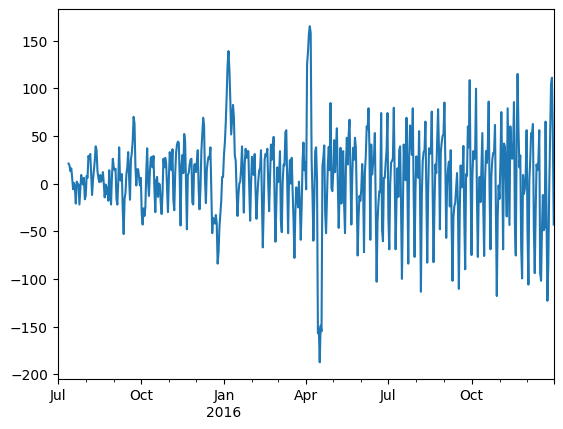

In [87]:
desea= dff['english'].diff(12)
desea.plot()

In [88]:
p_value=sm.tsa.stattools.adfuller(desea.dropna())[1]
if p_value<0.05:
 print(f"English is stationary")
else:
 print(f"English is non stationary")

English is stationary


### AutoCorrelation and PartialAutoCorrelation

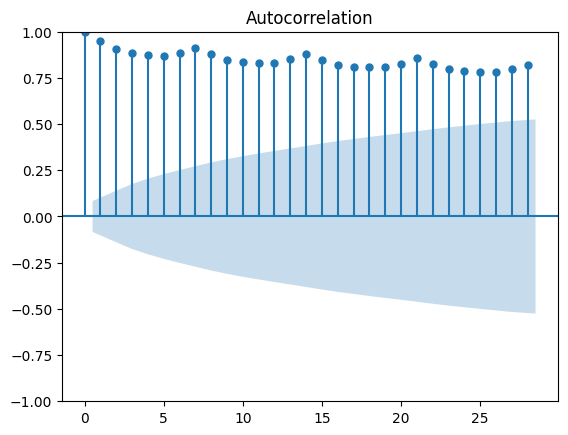

In [89]:
plot_acf(dff['english']);

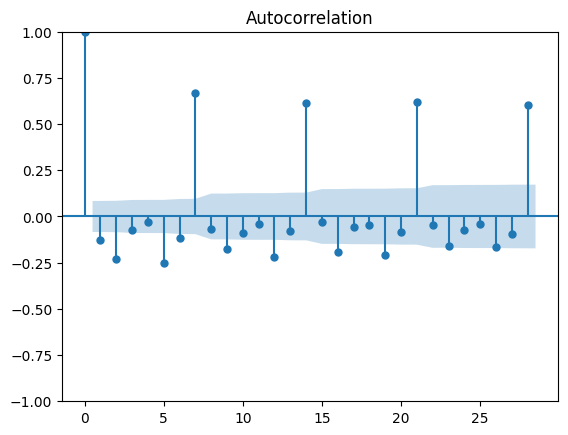

In [90]:
# Autocorelation for the detrended series
plot_acf(dff['english'].diff().dropna());

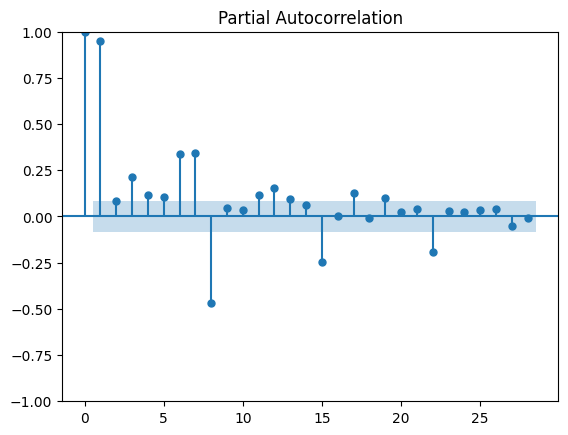

In [91]:
plot_pacf(dff['english']);

In [92]:
exo.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [93]:
dff['exog']=exo["Exog"].values

In [94]:
#last 12 months as test
train_max_date = dff.index[-12]
train_x = dff.loc[dff.index < dff.index[-12]].copy()
test_x = dff.loc[dff.index >= dff.index[-12]].copy()
test_x['english']

2016-12-20    471.00
2016-12-21    460.00
2016-12-22    517.00
2016-12-23    484.00
2016-12-24    422.00
2016-12-25    449.00
2016-12-26    523.00
2016-12-27    557.02
2016-12-28    557.02
2016-12-29    557.02
2016-12-30    554.00
2016-12-31    481.00
Name: english, dtype: float64

In [95]:
from sklearn.metrics import (
 mean_squared_error as mse,
 mean_absolute_error as mae,
 mean_absolute_percentage_error as mape
)
# Creating a function to print values of all these metrics.
def performance(actual, predicted):
 print('MAE :', round(mae(actual, predicted), 2))
 print('RMSE :', round(mse(actual, predicted)**0.5, 2))
 print('MAPE:', round(mape(actual, predicted), 2))

Triple Exponential Smoothing (Holt-Winter's Model)

/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: >

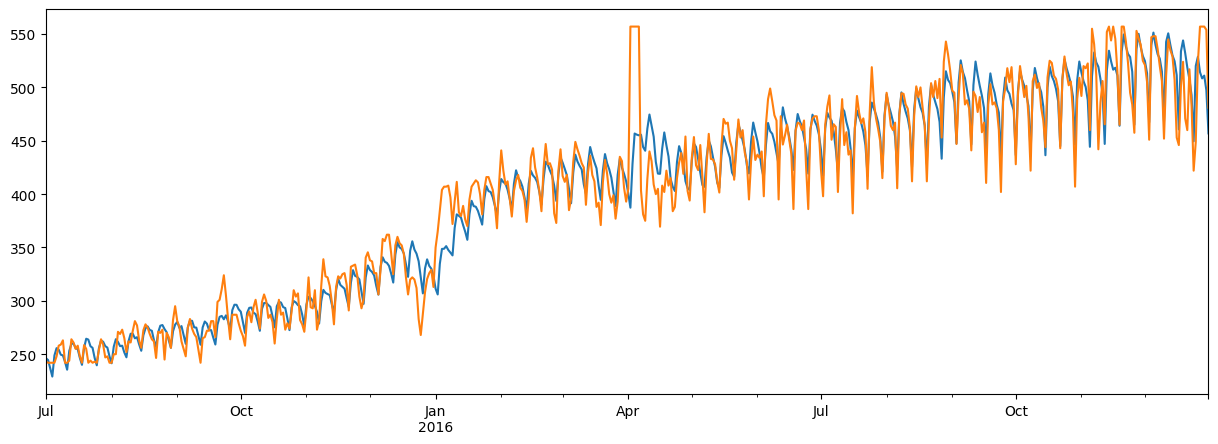

In [96]:
plt.figure(figsize=(15,5))
model = sm.tsa.ExponentialSmoothing(dff['english'], trend='add',
seasonal='add').fit(smoothing_level=1/(2*7))
model.fittedvalues.plot()
dff['english'].plot()

<Axes: >

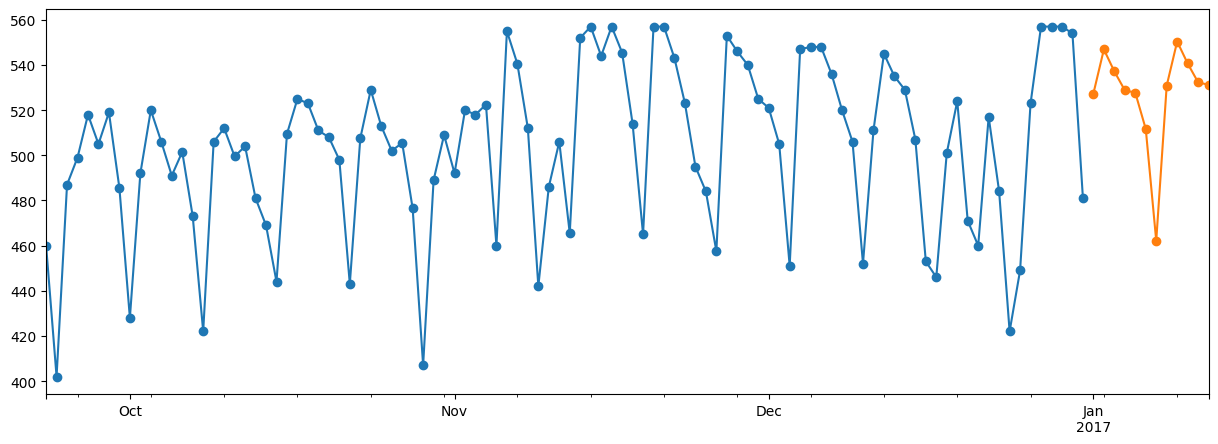

In [97]:
plt.figure(figsize=(15,5))
pred = model.forecast(steps = 12)
dff['english'].tail(100).plot(style='-o')
pred.plot(style='-o')


MAE : 36.78
RMSE : 42.97
MAPE: 0.08


/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


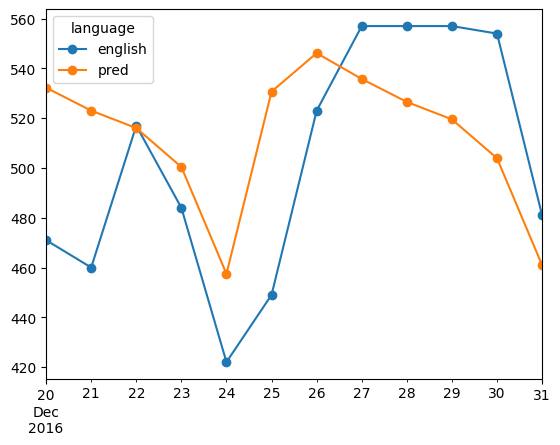

In [98]:
model = sm.tsa.ExponentialSmoothing(train_x['english'], trend='add',
seasonal='add').fit(smoothing_level=1/(2*7))
test_x['pred'] = model.forecast(steps=12)
test_x[['english','pred']].plot(style='-o')
performance(test_x['english'], test_x['pred'])

SARIMA Model

In [99]:
ar = [4,5,6,7,8]
ma = [5,6,7,8,9]
from sklearn.metrics import mean_absolute_percentage_error as mape
# mape_values_q=
result = []
for p in ar:
    for q in ma:
        model = SARIMAX(train_x['english'], order=(p, 0, q))
        model = model.fit(disp=False)
        test_x['pred'] = model.forecast(steps=12)
 # mape_values_q.append(round(mape(test_x['english'],test_x['pred']), 3))
        result.append([p,q,round(mape(test_x['english'],test_x['pred']), 3)])

pd.DataFrame(result,
columns=["p","q","mape"]).sort_values(by="mape",ascending=True)

/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/dc18/miniconda3/envs/hp2/lib/python

,p,q,mape
0,4,5,0.070
18,7,8,0.071
1,4,6,0.072
6,5,6,0.072
14,6,9,0.073
20,8,5,0.074
17,7,7,0.074
4,4,9,0.075
19,7,9,0.075
2,4,7,0.076


/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 34.79
RMSE : 41.96
MAPE: 0.07


/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


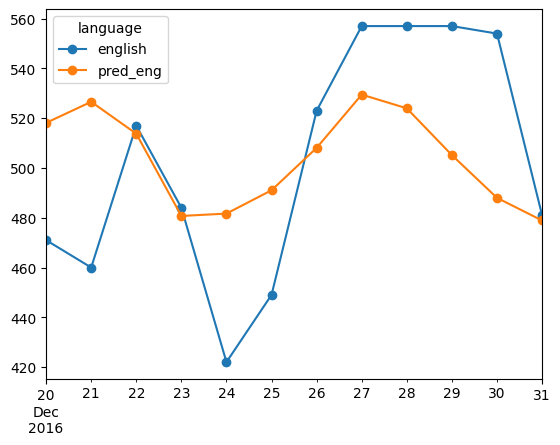

In [101]:
model_ARIMA = SARIMAX(train_x.english, order=(4, 1, 5))
model_ARIMA = model_ARIMA.fit(disp=False)
test_x['pred_eng'] = model_ARIMA.forecast(steps=12)
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])

SARIMA (p,d,q,P,D,Q,s)

In [102]:
ar_seasonal = [2,3]
ma_seasonal = [2,3]
result = []
for P in ar_seasonal:
    for Q in ma_seasonal:
        model = SARIMAX(train_x["english"],order=(6,1,9),seasonal_order=(P,1,Q,14))
        model = model.fit(disp=False)
        test_x['pred'] = model.forecast(steps=12)
        result.append([P,Q,round(mape(test_x["english"],test_x['pred']), 3)])
pd.DataFrame(result,
columns=["P","Q","mape"]).sort_values(by="mape",ascending=True)

/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mo

,P,Q,mape
0,2,2,0.066
1,2,3,0.067
3,3,3,0.067
2,3,2,0.070


/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 31.54
RMSE : 38.92
MAPE: 0.07


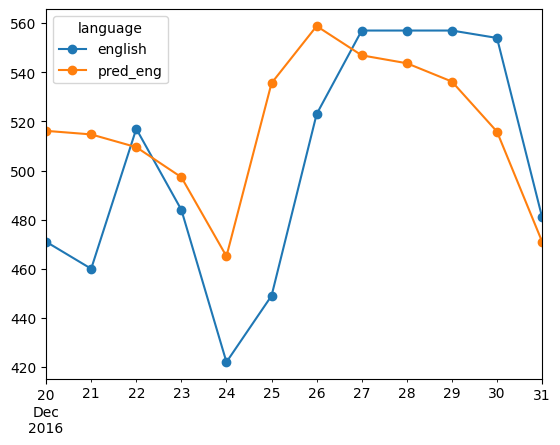

In [104]:
model_SARIMA= SARIMAX(train_x.english, order=(6,1,9), seasonal_order=(2,1,2,14))
model_SARIMA = model_SARIMA.fit(disp=False)
test_x['pred_eng'] = model_SARIMA.forecast(steps=12)
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])

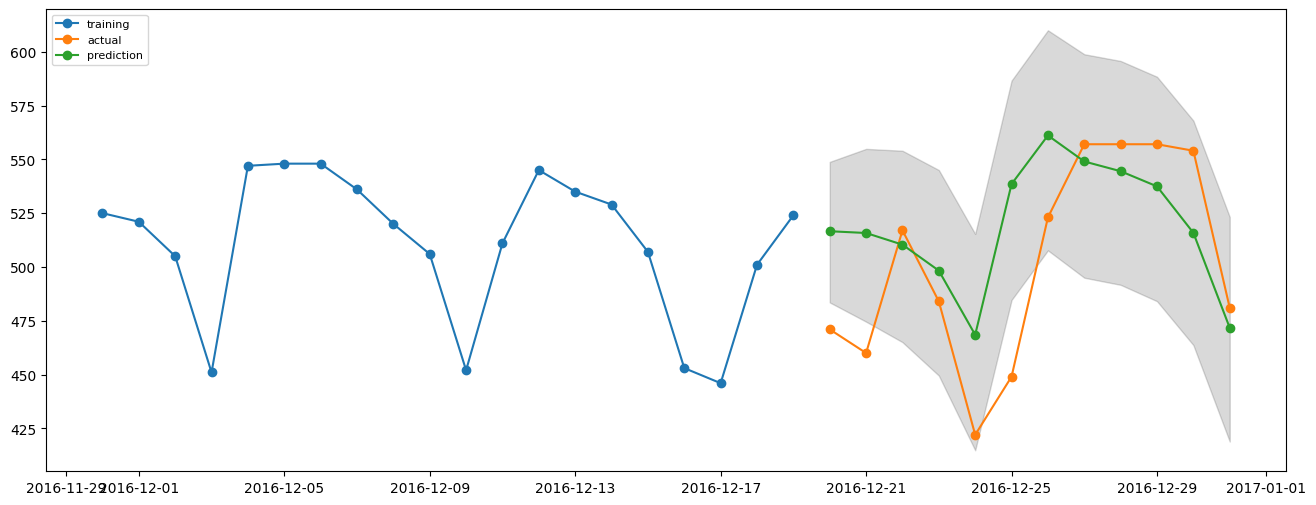

In [106]:
plt.figure(figsize=(16,6))
test_x[['lower', 'upper']] =model_SARIMA.get_forecast(steps=12).conf_int(0.05).values
plt.plot(train_x['english'][-20:], '-o', label='training')
plt.plot(test_x['english'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

SARIMAX

/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21975D+00    |proj g|=  5.03534D-02

At iterate    5    f=  4.20808D+00    |proj g|=  2.00066D-02

At iterate   10    f=  4.19315D+00    |proj g|=  1.07636D-01

At iterate   15    f=  4.17850D+00    |proj g|=  5.30263D-02

At iterate   20    f=  4.16705D+00    |proj g|=  5.46560D-02

At iterate   25    f=  4.15489D+00    |proj g|=  5.59603D-02

At iterate   30    f=  4.13417D+00    |proj g|=  7.85499D-02

At iterate   35    f=  4.12828D+00    |proj g|=  1.97837D-02

At iterate   40    f=  4.12551D+00    |proj g|=  1.79728D-02

At iterate   45    f=  4.12314D+00    |proj g|=  1.01329D-02


/Users/dc18/miniconda3/envs/hp2/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.12297D+00    |proj g|=  1.07536D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     59      1     0     0   1.075D-02   4.123D+00
  F =   4.1229743175144291     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
MAE : 34.65
RMSE : 39.5
MAPE: 0.07


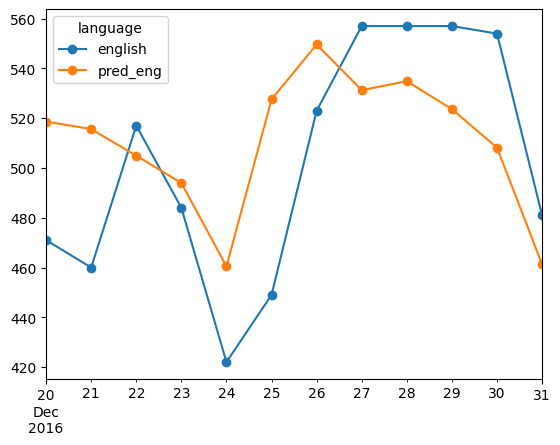

In [108]:
start=len(train_x)
end=len(train_x)+len(test_x)-1
model_SARIMAX =SARIMAX(train_x['english'],exog=train_x['exog'],order=(6,1,9),seasonal_order=(2,1,2,14),enforce_invertibility=False)
results = model_SARIMAX.fit()
test_x['pred_eng'] = results.predict(start=start, end=end,
exog=test_x['exog']).rename('Predictions')
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])